In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'1.1.3'

In [3]:
# Read the CSV data into a DataFrame object
insuranceData = pd.read_csv('insurance.csv')

In [80]:
# Examine the columns (features) of the dataset
insuranceData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 123.6+ KB


In [81]:
# Get a glimpse of the first 5 rows of the insurance dataset
insuranceData.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [82]:
# Get a glimpse of the last 5 rows of the insurance dataset
insuranceData.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [83]:
# Check how many rows are in the dataset
len(insuranceData)

1338

In [84]:
print('Total insurance data rows: ',len(insuranceData))

Total insurance data rows:  1338


In [9]:
type(insuranceData)

pandas.core.frame.DataFrame

In [10]:
# Check if there are any null values in the dataset
print(insuranceData.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [11]:
# Drop any null values
insuranceData.dropna(inplace=True)

In [12]:
print('Total insurance data rows: ',len(insuranceData))

Total insurance data rows:  1338


In [13]:
insuranceDataAge=insuranceData["age"].to_frame()

In [14]:
insuranceDataAge.columns =[ 'age']

In [15]:
insuranceDataAge

,age
0,19
1,18
2,28
3,33
4,32
...,...
1333,50
1334,18
1335,18
1336,21


In [16]:
insuranceDataAge.sort_values(by=['age'],ascending=True)

,age
1248,18
482,18
492,18
525,18
529,18
...,...
398,64
335,64
378,64
1265,64


In [17]:
print('Minimum age of insured: ',insuranceDataAge.min() )

Minimum age of insured:  age    18
dtype: int64


In [18]:
print('Maximum age of insured: ',insuranceDataAge.max() )

Maximum age of insured:  age    64
dtype: int64


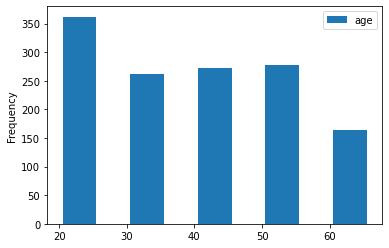

In [19]:
# Observe the distribution of ages in the dataset
custom_bins = [18, 28, 38, 48,58,68]
insuranceDataAge.plot.hist('age',  bins=custom_bins,rwidth =0.5)
plt.show()

In [20]:
insuranceDataAge=insuranceData[['age','charges']].copy()

In [21]:
insuranceDataPrice = insuranceData[['charges']].copy()

<AxesSubplot:xlabel='age', ylabel='charges'>

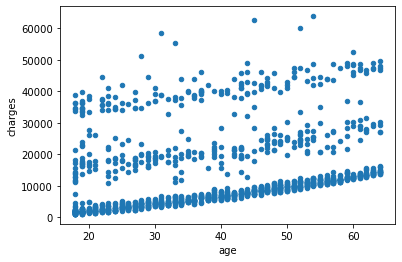

In [22]:
insuranceDataAge.plot('age', 'charges', kind='scatter')

<AxesSubplot:xlabel='sex', ylabel='charges'>

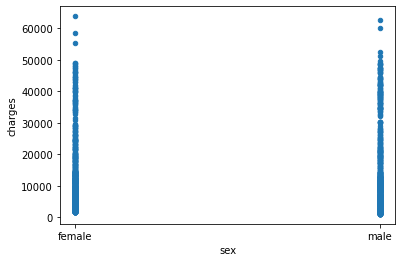

In [23]:
insuranceDataSex=insuranceData[['sex','charges']].copy()
insuranceDataSex.plot('sex', 'charges', kind='scatter')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

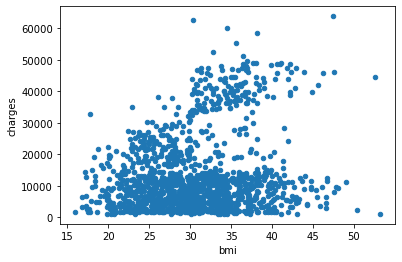

In [24]:
insuranceDataBMI=insuranceData[['bmi','charges']].copy()
insuranceDataBMI.plot('bmi', 'charges', kind='scatter')

<AxesSubplot:xlabel='children', ylabel='charges'>

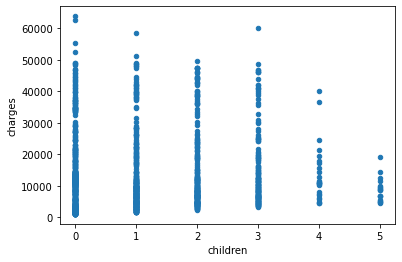

In [25]:
insuranceDataChildren=insuranceData[['children','charges']].copy()
insuranceDataChildren.plot('children', 'charges', kind='scatter')

<AxesSubplot:xlabel='smoker', ylabel='charges'>

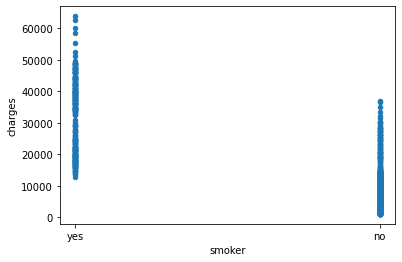

In [26]:
insuranceDataSmoker=insuranceData[['smoker','charges']].copy()
insuranceDataSmoker.plot('smoker', 'charges', kind='scatter')

<AxesSubplot:xlabel='region', ylabel='charges'>

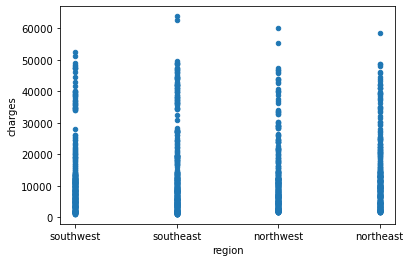

In [27]:
insuranceDataRegion=insuranceData[['region','charges']].copy()
insuranceDataRegion.plot('region', 'charges', kind='scatter')

<AxesSubplot:xlabel='region', ylabel='smoker'>

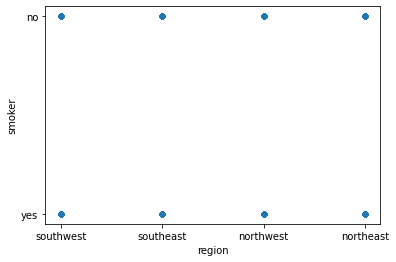

In [28]:
insuranceDataRegionSmoker=insuranceData[['smoker','region']].copy()
insuranceDataRegionSmoker.plot('region', 'smoker', kind='scatter')

In [29]:
len(insuranceDataRegionSmoker)

1338

In [137]:
train_dataset = insuranceData.sample(frac=0.85, random_state=1)
test_dataset = insuranceData.drop(train_dataset.index)

In [138]:
len(train_dataset)

1137

In [139]:
len(test_dataset)

201

In [70]:
!pip install pandas_profiling

  Created wheel for phik: filename=phik-0.11.2-py3-none-any.whl size=1107420 sha256=7e88a275f772d6ed7cfdbc74e9d29db5121f994643968013b021c462c356d844
  Stored in directory: c:\users\amshuman\appdata\local\pip\cache\wheels\72\9a\23\097c93fd8341220d92674891b6a9a30f0e389719d9b7291bd2
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27091 sha256=6d6bea2a8adaf3c1ee104cec8079f630af50b62922c373b0a7a42601d66b6195
  Stored in directory: c:\users\amshuman\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295204 sha256=508bcbb84b1cb5b0e6e793caa3e4b9e5a6ef00d0edd4469b463409ca9ea3bdd6
  Stored in directory: c:\users\amshuman\appdata\local\pip\cache\wheels\48\a1\7f\096c1269d6bf78d4768180602579b35a1e8cb1250bb4b40c74
Successfully built phik htmlmin imagehash


In [71]:
from pandas_profiling import ProfileReport
prof = ProfileReport(insuranceData)
prof.to_file(output_file='output.html')

In [33]:
import statsmodels.api as sm
import numpy as np

In [140]:
train_dataset_Y = train_dataset['charges'].copy()
train_dataset_X = train_dataset.drop('charges',axis=1)
type(train_dataset_X)



pandas.core.frame.DataFrame

In [141]:
from sklearn.linear_model import LinearRegression

In [142]:
lm = LinearRegression()

In [143]:
train_dataset_X.head()

,age,sex,bmi,children,smoker,region
559,19,male,35.53,0,no,northwest
1087,57,male,31.54,0,no,northwest
1020,51,male,37.00,0,no,southwest
460,49,female,36.63,3,no,southeast
802,21,male,22.30,1,no,southwest


In [144]:
train_dataset_X["region"].replace({"southwest": 1.0, "southeast": 2.0,"northwest": 3.0, "northeast": 4.0}, inplace=True)

In [145]:
train_dataset_X["smoker"].replace({"no": 0.0, "yes": 1.0}, inplace=True)

In [146]:
train_dataset_X["sex"].replace({"male": 1.0, "female": 0}, inplace=True)

In [147]:
train_dataset_X.head()


,age,sex,bmi,children,smoker,region
559,19,1.0,35.53,0,0.0,3.0
1087,57,1.0,31.54,0,0.0,3.0
1020,51,1.0,37.00,0,0.0,1.0
460,49,0.0,36.63,3,0.0,2.0
802,21,1.0,22.30,1,0.0,1.0


In [148]:
lm.fit(train_dataset_X, train_dataset_Y)

LinearRegression()

In [149]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: -13649.657125296726


In [150]:
test_dataset_Y = test_dataset['charges'].copy()
test_dataset_X = test_dataset.drop('charges',axis=1)
type(test_dataset_X)



pandas.core.frame.DataFrame

In [151]:
test_dataset_X["sex"].replace({"male": 1.0, "female": 0}, inplace=True)
test_dataset_X["region"].replace({"southwest": 1.0, "southeast": 2.0,"northwest": 3.0, "northeast": 4.0}, inplace=True)
test_dataset_X["smoker"].replace({"no": 0.0, "yes": 1.0}, inplace=True)

In [152]:
test_dataset_X.head()

,age,sex,bmi,children,smoker,region
15,19,1.0,24.600,1,0.0,1.0
20,60,0.0,36.005,0,0.0,4.0
21,30,0.0,32.400,1,0.0,1.0
24,37,1.0,28.025,2,0.0,3.0
25,59,0.0,27.720,3,0.0,2.0


In [153]:
# first five predicted prices
y_pred = lm.predict(test_dataset_X)

In [154]:
len(y_pred)

201

In [155]:
len(test_dataset_Y)

201

In [156]:
from sklearn.metrics import mean_absolute_error

In [157]:
mean_absolute_error(test_dataset_Y, y_pred)

4012.588698082743

In [158]:
from sklearn import linear_model

In [159]:
regRidge = linear_model.Ridge(alpha=.5)

In [160]:
regRidge.fit(train_dataset_X, train_dataset_Y)

Ridge(alpha=0.5)

In [161]:
regRidge.coef_

array([  256.96237706,  -118.22889832,   349.6386705 ,   434.0564615 ,
       23240.54073066,   374.35965922])

In [162]:
regRidge.intercept_

-13634.460408584404

In [163]:
y_pred_ridge = regRidge.predict(test_dataset_X)

In [164]:
mean_absolute_error(test_dataset_Y, y_pred_ridge)

4020.8017086102973

In [165]:
regLasso = linear_model.Lasso(alpha=0.1)

In [166]:
regLasso.fit(train_dataset_X, train_dataset_Y)

Lasso(alpha=0.1)

In [167]:
regLasso.coef_

array([  257.06520227,  -121.593775  ,   349.65213486,   433.84485754,
       23302.60213774,   374.08267732])

In [168]:
regLasso.intercept_

-13649.246603497464

In [169]:
y_pred_Lasso = regLasso.predict(test_dataset_X)

In [170]:
mean_absolute_error(test_dataset_Y, y_pred_ridge)

4020.8017086102973

In [171]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [172]:
regSGD = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))

In [173]:
regSGD.fit(train_dataset_X, train_dataset_Y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [174]:
y_pred_SGD = regSGD.predict(test_dataset_X)

In [175]:
mean_absolute_error(test_dataset_Y, y_pred_SGD)

4048.054473449392

In [176]:
test_dataset_Y.head(10)

15     1837.23700
20    13228.84695
21     4149.73600
24     6203.90175
25    14001.13380
44     6079.67150
55    47496.49445
63     4133.64165
77     1532.46970
79     6571.02435
Name: charges, dtype: float64

In [177]:
y_pred_SGD[:5]

array([  562.21526115, 15938.33860001,  6292.6715006 ,  7555.82937458,
       13263.41792652])

In [178]:
from sklearn.ensemble import RandomForestRegressor

In [179]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [180]:
regressor.fit(train_dataset_X, train_dataset_Y)

RandomForestRegressor(random_state=0)

In [181]:
Y_pred_rf = regressor.predict(test_dataset_X)

In [182]:
mean_absolute_error(test_dataset_Y, Y_pred_rf)

2620.146250276086

In [183]:
Y_pred_rf[:10]

array([ 1976.679051 , 13778.2754029,  5575.9038241,  6448.9746695,
       14284.7853597,  8614.5682638, 48291.795989 ,  4994.4592349,
        1763.4736751,  6323.359094 ])

In [184]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV



In [185]:
regRidge.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [186]:
#param_grid = [{'C': [0.001, 0.1, 1, 10, 100]}]
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}


grid = GridSearchCV(regRidge, param_grid = parameters,cv=6)

grid.fit(train_dataset_X, train_dataset_Y)
print(grid.best_params_)
grid_predictions = grid.predict(test_dataset_X) 




{'copy_X': True, 'fit_intercept': True, 'normalize': False}


In [187]:
len(grid_predictions)

201

In [188]:
mean_absolute_error(test_dataset_Y, grid_predictions)

4020.8017086102973

In [189]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_dataset_Y, grid_predictions)

35607525.613738716

In [190]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [191]:
from xgboost import XGBRegressor

In [192]:
XGBmodel = XGBRegressor()

In [193]:
cv = RepeatedKFold(n_splits=, n_repeats=3, random_state=1)

In [195]:
cvscr = cross_val_score(XGBmodel, train_dataset_X, train_dataset_Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [196]:
from numpy import absolute

In [197]:
scores = absolute(cvscr)

In [198]:
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 3123.548 (343.425)


In [200]:
XGBmodel.fit(train_dataset_X, train_dataset_Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [201]:
y_pred_XGB = XGBmodel.predict(test_dataset_X)

In [202]:
mean_absolute_error(test_dataset_Y, y_pred_XGB)

2792.76951686538